In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [7]:
df = pd.read_csv("Cleaned_Data.csv")

# df_text = pd.read_csv("Clean_Test.csv")

In [11]:
X = df['Clean_text']
y = df['target']

In [25]:
pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('classifier',SVC())
])

In [35]:
param_grid = [
    {
        'vectorizer__max_features' : [None,10,100,1000,2000],
        'classifier__kernel' : ['linear','rbf','poly','sigmoid'],
        'classifier__C' : [0.1,1,10,100]
    }
]

In [37]:
grid = GridSearchCV(pipeline,param_grid,cv=5,scoring='accuracy',n_jobs= -1)

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [41]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid=[{'classifier__C': [0.1, 1, 10, 100],
                          'classifier__kernel': ['linear', 'rbf', 'poly',
                                                 'sigmoid'],
                          'vectorizer__max_features': [None, 10, 100, 1000,
                                                       2000]}],
             scoring='accuracy')

In [45]:
y_pred = grid.predict(X_test)

In [47]:
print(accuracy_score(y_test,y_pred))

0.8034300791556728


In [49]:
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       876
           1       0.82      0.68      0.75       640

    accuracy                           0.80      1516
   macro avg       0.81      0.79      0.79      1516
weighted avg       0.81      0.80      0.80      1516



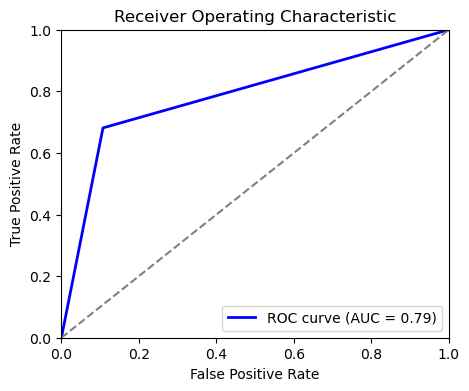

In [51]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()